In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.13.1


# 基本分类

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 35s 8us/step


In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

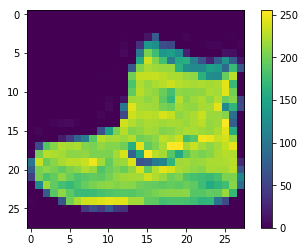

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [9]:
train_images = train_images/255.0
test_images = test_images/255.0

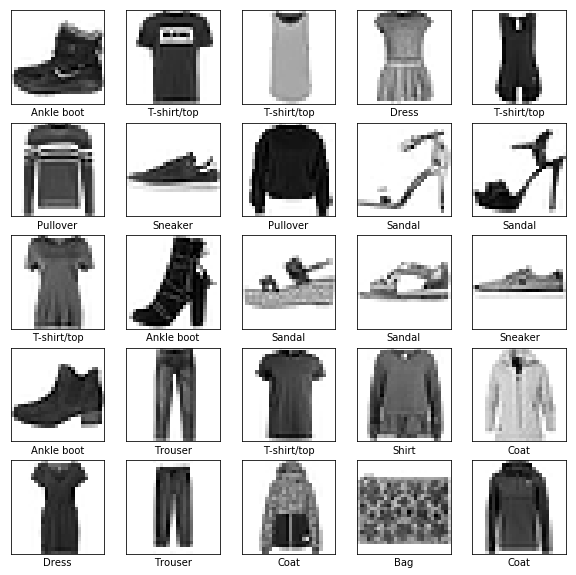

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

第一层 Flatten 将图像格式从二维数组（28x28 像素）转换成一维数组（28 * 28 = 784 像素）,数据扁平化。
第一个 Dense 层具有 128 个节点（或神经元）。第二个（也是最后一个）层是具有 10 个节点的 softmax 层，该层会返回一个具有 10 个概率得分的数组，这些得分的总和为 1。Dense层是密集连接或全连接层。 

## Step1.构建模型

In [13]:
# 设置层
# 第一层 Flatten 将图像格式从二维数组（28x28 像素）转换成一维数组（28 * 28 = 784 像素）,数据扁平化。
# 第一个 Dense 层具有 128 个节点（或神经元）。
# 第二个（也是最后一个）层是具有 10 个节点的 softmax 层，该层会返回一个具有 10 个概率得分的数组，这些得分的总和为 1。
# Dense层是密集连接或全连接层。
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


## Step2.编译模型

In [14]:
# 模型还需要再进行几项设置才可以开始训练：
#     1.损失函数
#     2.优化器
#     3.指标
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Step3.训练模型

In [24]:
# 训练神经网络模型需要执行以下步骤：
#     1.将训练数据输入到模型中。
#     2.模型学习将数据与标签相关联。
#     3.模型对测试集进行预测，验证预测结果是否与测试集中的标签一致。
# 调用 model.fit 方法，使模型与训练数据“拟合”：
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 18s 307us/sample - loss: 0.2806 - acc: 0.8954
Epoch 2/10
60000/60000 [==============================] - 18s 298us/sample - loss: 0.2664 - acc: 0.9010
Epoch 3/10
60000/60000 [==============================] - 18s 307us/sample - loss: 0.2572 - acc: 0.9046
Epoch 4/10
60000/60000 [==============================] - 18s 303us/sample - loss: 0.2484 - acc: 0.9082
Epoch 5/10
60000/60000 [==============================] - 18s 303us/sample - loss: 0.2379 - acc: 0.9106
Epoch 6/10
60000/60000 [==============================] - 18s 304us/sample - loss: 0.2318 - acc: 0.9134
Epoch 7/10
60000/60000 [==============================] - 19s 310us/sample - loss: 0.2241 - acc: 0.9162
Epoch 8/10
60000/60000 [==============================] - 19s 319us/sample - loss: 0.2165 - acc: 0.9183
Epoch 9/10
60000/60000 [==============================] - 19s 320us/sample - loss: 0.2118 - acc: 0.9205
Epoch 10/10
60000/60000 [==============================] - 20s 3

## Step4.评估准确率

In [25]:
# 比较一下模型在测试数据集上的表现:
# 调用model.evaluate方法
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 2s 162us/sample - loss: 0.3424 - acc: 0.8868
Test accuracy: 0.8868


## Step5.做出预测

In [26]:
predictions = model.predict(test_images)
# take a look about first sample
print('The prediction is: ',predictions[0])
index = np.argmax(predictions[0])
print('It is predicted as: ',index,class_names[index])
print('It actually is: ',test_labels[0],class_names[test_labels[0]])

The prediction is:  [1.91981472e-10 2.51230963e-11 5.10286223e-11 4.73861944e-13
 1.09279625e-08 8.26707619e-05 4.77174966e-10 3.73549806e-03
 1.82201154e-09 9.96181846e-01]
It is predicted as:  9 Ankle boot
It actually is:  9 Ankle boot


In [19]:
# 将该预测绘制成图来查看全部 10 个通道
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

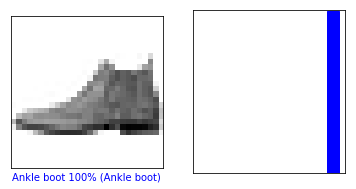

In [27]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

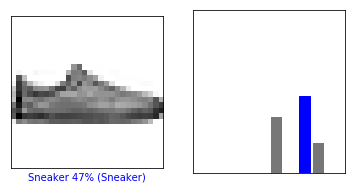

In [28]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

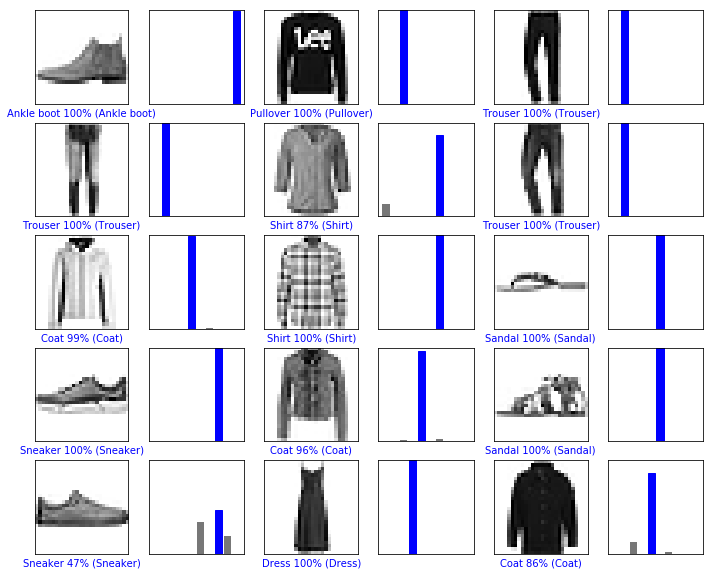

In [29]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

(28, 28)
(1, 28, 28)
[[1.91981847e-10 2.51231449e-11 5.10286223e-11 4.73863787e-13
  1.09279625e-08 8.26710748e-05 4.77175854e-10 3.73549806e-03
  1.82200810e-09 9.96181846e-01]]


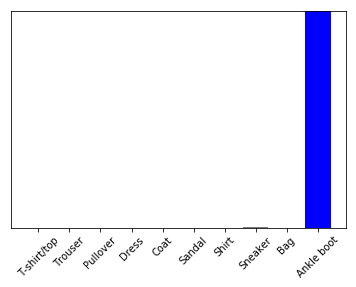

In [30]:
# 最后，使用经过训练的模型对单个图像进行预测
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

# tf.keras 模型已经过优化，可以一次性对样本批次或样本集进行预测。因此，即使我们使用单个图像，仍需要将其添加到列表中
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(0, predictions_single, test_labels)

_ = plt.xticks(range(10), class_names, rotation=45)

# 文本分类

## 下载 IMDB 数据集

In [ ]:
imdb = keras.datasets.imdb
# num_words=10000 会保留训练数据中出现频次在前 10000 位的字词
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


 7241728/17464789 [===========>..................] - ETA: 3:19